In [1]:
'''
SELECT * 
FROM `ftds-hacktiv8-project.phase1_ftds_015_rmt.credit-card-information`
WHERE MOD (CUST_ID, 2) != 0;
'''

'\nSELECT * \nFROM `ftds-hacktiv8-project.phase1_ftds_015_rmt.credit-card-information`\nWHERE MOD (CUST_ID, 2) != 0;\n'

Dataset : credit-card-information

Objective : Create a clustering model to perform customer segmentation from the credit card data.

# II. Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from statsmodels.stats.outliers_influence import variance_inflation_factor



import joblib
import json
import warnings
warnings.simplefilter("ignore")

# III. Data Loading

In [3]:
# load data
raw_data = pd.read_csv('h8dsft_P1G4_Samuel_Naiborhu.csv')
pd.set_option('display.max_columns', None)
raw_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [4]:
raw_data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,2345,9629.808851,1.0,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.0,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.0,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.0,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.0,205.0,205.0,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7,1,10500.0,665.239171,817.844662,0.0,11


# IV. Exploratory Data Analysis (EDA)

In [147]:
# data description
raw_data.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4320.000000,4475.000000,4475.000000
mean,4475.000000,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,873.976757,0.150224,11.518212
std,2583.931114,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2436.877272,0.289081,1.328925
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,2238.000000,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,168.590144,0.000000,12.000000
50%,4475.000000,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,313.980229,0.000000,12.000000
75%,6712.000000,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,819.371080,0.125000,12.000000
max,8949.000000,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


From the table above, we found that The largest purchases a person has made is \$ 41050. While the median purchases made by a person is \$ 360. The largest one-off purchases (paid once) a person has made is \$ 40624.060000. While the median one-off purchases (paid once) purchases made by a person is \$ 45.650000. People using the credit cards on average purchases with installment (0.363886 out of 1) more frequently than people who paid one-off(0.202301 out of 1)

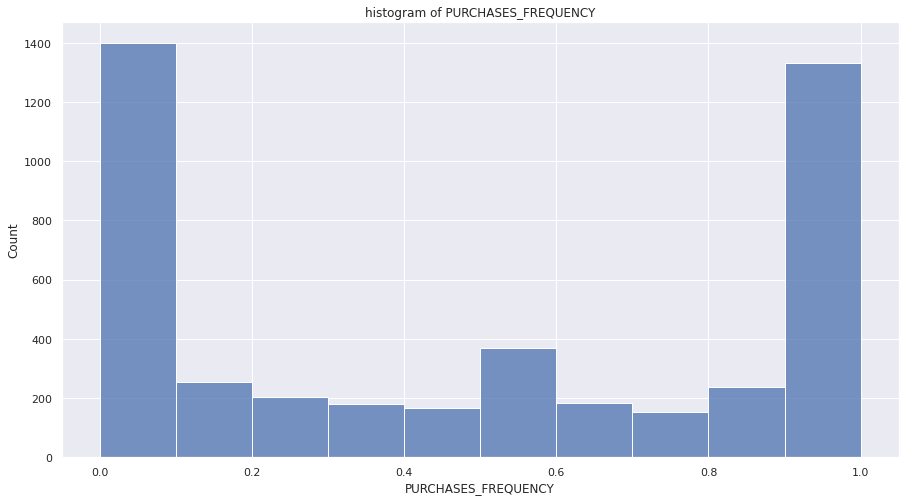

In [149]:
# Create plots

plt.figure(figsize=(15, 8))

sns.histplot(raw_data['PURCHASES_FREQUENCY'], bins=10)
plt.title('histogram of PURCHASES_FREQUENCY')


plt.show()


The people who uses the credit card, are varied with their uses, ther are lots who uses it often, and there are others who use it rarely, while there are a few in between.

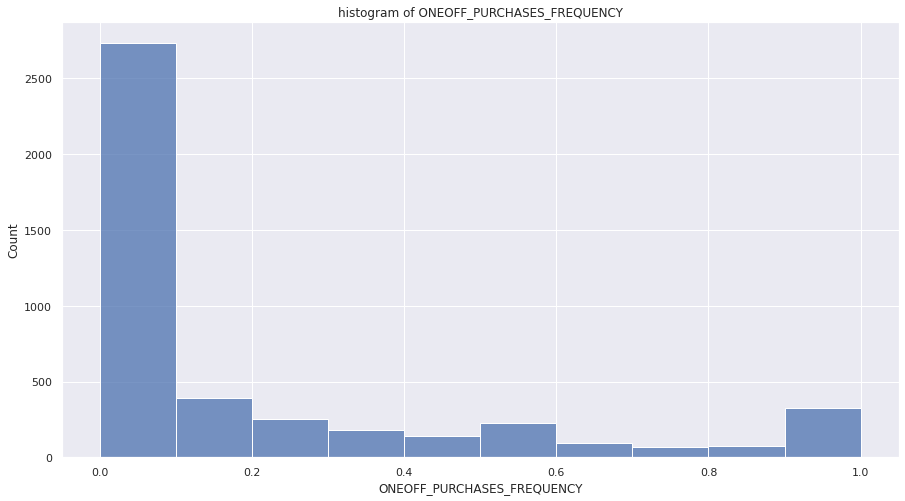

In [ ]:
# Create plots

plt.figure(figsize=(15, 8))

sns.histplot(raw_data['ONEOFF_PURCHASES_FREQUENCY'], bins=10)
plt.title('histogram of ONEOFF_PURCHASES_FREQUENCY')


plt.show()


People rarely purchase one-off(paid once).

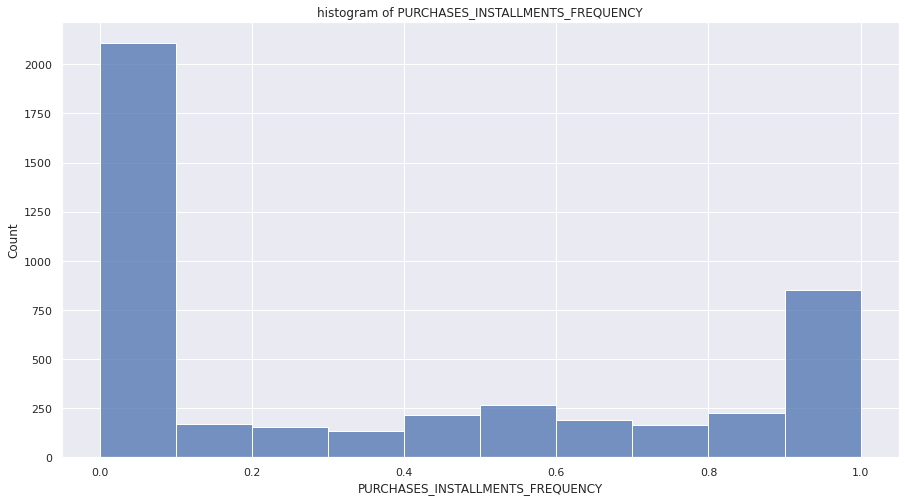

In [ ]:
# Create plots

plt.figure(figsize=(15, 8))

sns.histplot(raw_data['PURCHASES_INSTALLMENTS_FREQUENCY'], bins=10)
plt.title('histogram of PURCHASES_INSTALLMENTS_FREQUENCY')


plt.show()


The people who paid installment, are varied. there are lots who never uses it, and there are quite a lot of others who use it often, while there are a some in between.

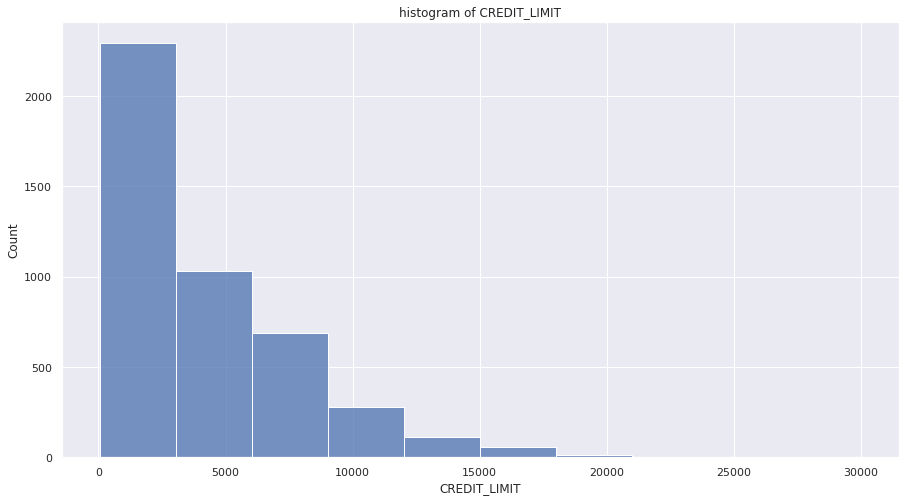

In [ ]:
# Create plots

plt.figure(figsize=(15, 8))

sns.histplot(raw_data['CREDIT_LIMIT'], bins=10)
plt.title('histogram of CREDIT_LIMIT')


plt.show()


In [150]:
raw_data['CREDIT_LIMIT'].median()

3000.0

As we can see from the chart above, that most of credit card user has a low limit. The median is \$ 3000

# V. Data preprocessing

## V.I. define dataframe for inferencing

In [7]:
# view dataset size
raw_data.shape[0]

4475

In [8]:
# define inference data counts
inf_count =  round(raw_data.shape[0]*0.05)
inf_count

224

In [9]:
# Get Data for model inference
data_inf = raw_data.sample(inf_count, random_state=33)
data_inf.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4140,3599,173.940108,0.5,958.50,958.50,0.00,404.991463,0.30,0.300000,0.000000,0.100000,2,6,16000.0,3213.848412,76.806928,1.0,10
237,217,1087.567113,1.0,564.54,357.90,206.64,0.000000,0.75,0.083333,0.666667,0.000000,0,16,1400.0,443.196272,473.446195,0.0,12
3973,4035,4962.753828,1.0,618.40,618.40,0.00,2555.103715,1.00,1.000000,0.000000,0.166667,2,12,7000.0,2412.673715,1565.706094,0.0,12
323,8569,1552.687961,1.0,654.16,557.16,97.00,0.000000,0.75,0.500000,0.583333,0.000000,0,21,1500.0,1041.793202,1676.396511,0.0,12
3528,8013,3312.514107,1.0,0.00,0.00,0.00,830.921998,0.00,0.000000,0.000000,0.333333,5,0,6500.0,962.359607,861.467363,0.0,12


In [10]:
# drop data_inf from main dataframe
raw_data_1 = raw_data.drop(data_inf.index)
print(f'old data size: {raw_data.shape[0]}')
print(f'new data size: {raw_data_1.shape[0]}')

old data size: 4475
new data size: 4251


## V.II Handling Empty Values

In [11]:
# Duplicate dataset to new one ,if something breaks we can start from here instead from the beginning
raw_data_2 = raw_data_1.copy()

In [12]:
# sum null value
raw_data_2.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    144
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
empty_val = raw_data_2[raw_data_2['MINIMUM_PAYMENTS'].isnull()]
empty_val.sample(20)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1290,6207,147.418569,0.181818,1074.00,1074.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,2,5500.0,0.000000,NaN,0.0,12
1053,8201,0.298538,0.090909,510.00,0.00,510.00,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,6500.0,557.480712,NaN,0.0,12
675,3951,0.000000,0.000000,631.20,0.00,631.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,861.744611,NaN,0.0,12
1130,8935,0.000000,0.000000,102.72,0.00,102.72,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1500.0,0.000000,NaN,0.0,12
3121,8929,39.642014,1.000000,0.00,0.00,0.00,45.175571,0.000000,0.000000,0.000000,0.083333,1,0,5000.0,0.000000,NaN,0.0,12
4274,3943,8.187263,0.111111,0.00,0.00,0.00,793.848237,0.000000,0.000000,0.000000,0.111111,1,0,1350.0,0.000000,NaN,0.0,9
3828,4123,37.324758,0.166667,0.00,0.00,0.00,720.142017,0.000000,0.000000,0.000000,0.166667,6,0,4000.0,0.000000,NaN,0.0,6
21,883,1464.324632,1.000000,1174.39,1174.39,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,8,9000.0,0.000000,NaN,0.0,12
1288,6101,19.516936,0.090909,851.00,851.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,5000.0,9821.138115,NaN,0.0,12
1400,2759,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [14]:
raw_data_2['MINIMUM_PAYMENTS'].median()

311.637186

In [15]:
raw_data_3 = raw_data_2.fillna(raw_data_2['MINIMUM_PAYMENTS'].median())

In [16]:
raw_data_3.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## V.III  Hadling Outlier

In [17]:
# Plot outlier for target

def outlier_plot(features):
    # Define figure size
    plt.figure(figsize=(16, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(features, bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=features)
    plt.title('Boxplot')

    plt.show()

In [18]:
# make boundary function
def iqr_calc(feature):
    skew_value = feature.skew()
    if -0.5 > skew_value < 0.5:
        upper_boundary = feature.mean() + 3 * feature.std()
        lower_boundary = feature.mean() - 3 * feature.std()
    else:
        IQR= feature.quantile(0.75) - feature.quantile(0.25)
        lower_boundary= feature.quantile(0.25)-(IQR*1.5)
        upper_boundary= feature.quantile(0.75)+(IQR*1.5)
    return lower_boundary, upper_boundary

In [19]:
# make capping function
def capping_data(dataset, column):
  lower_bound, upper_bound = iqr_calc(dataset[column])
  dataset.loc[dataset[column] > upper_bound, column] = upper_bound
  dataset.loc[dataset[column] < lower_bound, column] = lower_bound
  return dataset

In [20]:
# Get Numerical Columns and Categorical Columns

num_columns = raw_data_3.select_dtypes(include=np.number).columns.tolist()
cat_columns = raw_data_3.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
Categorical Columns :  []


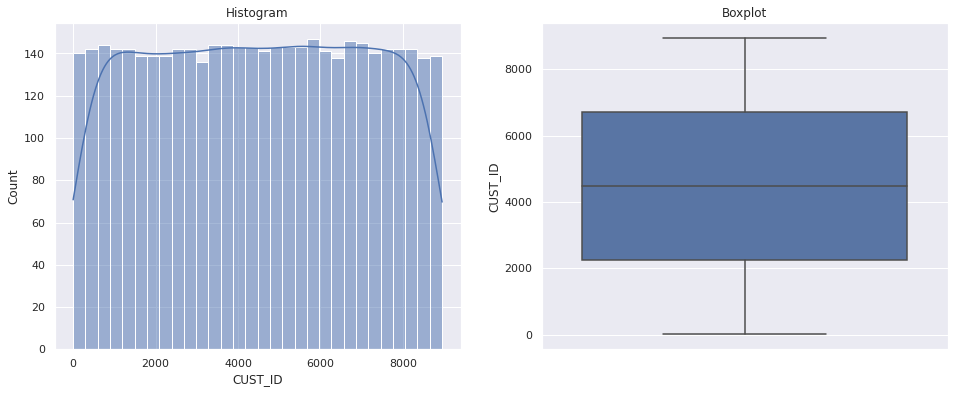

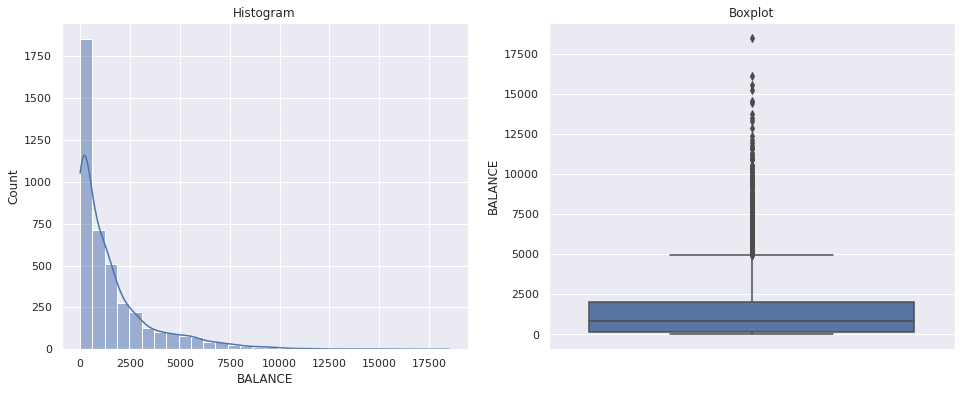

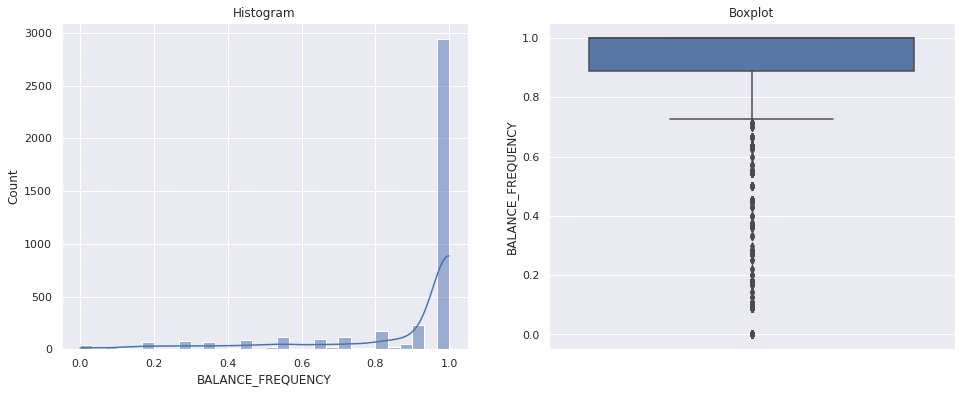

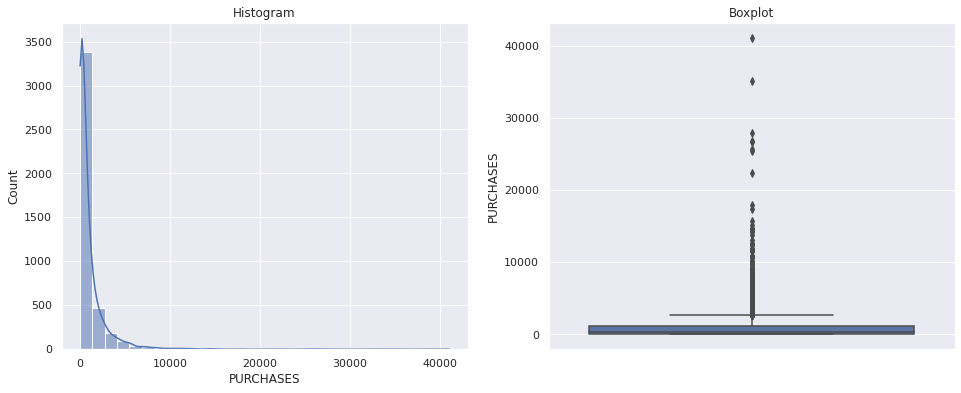

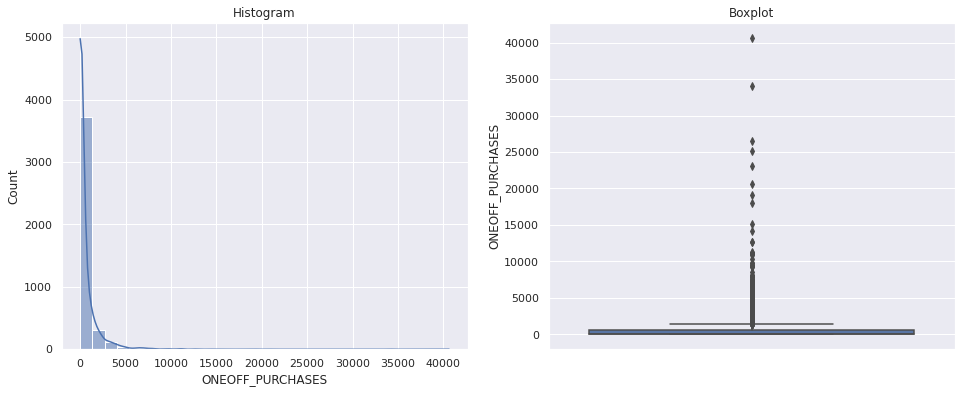

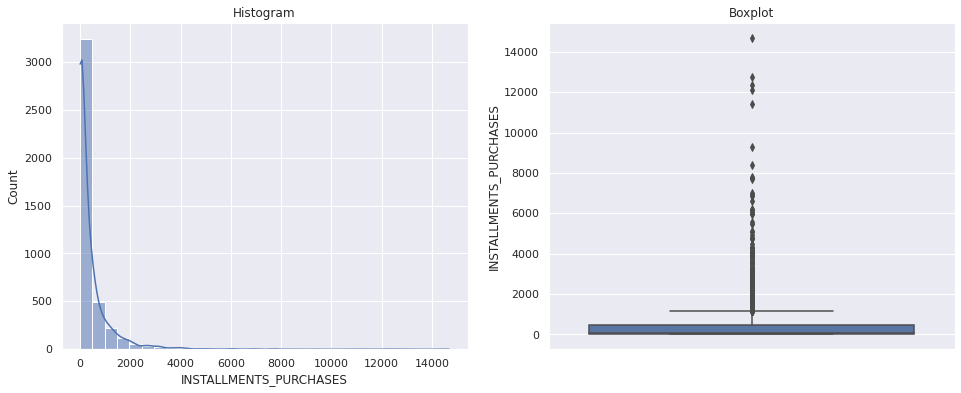

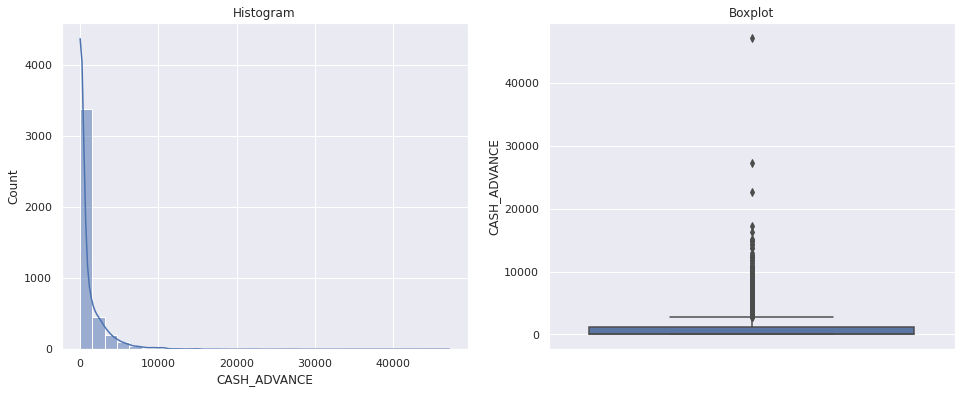

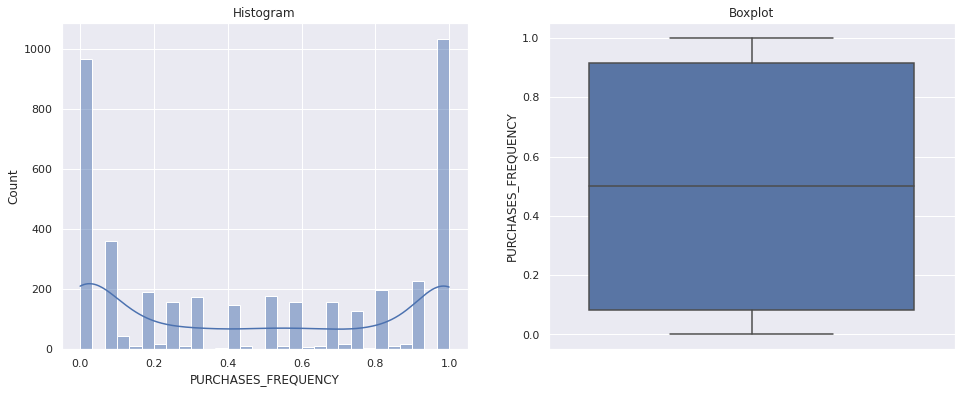

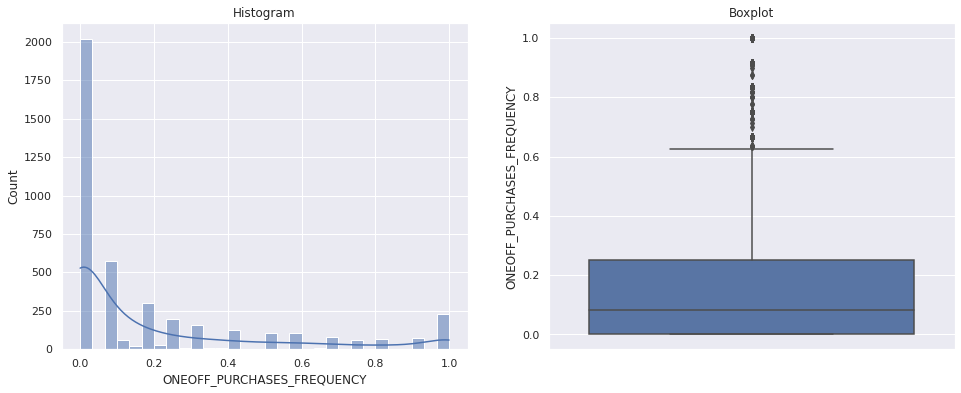

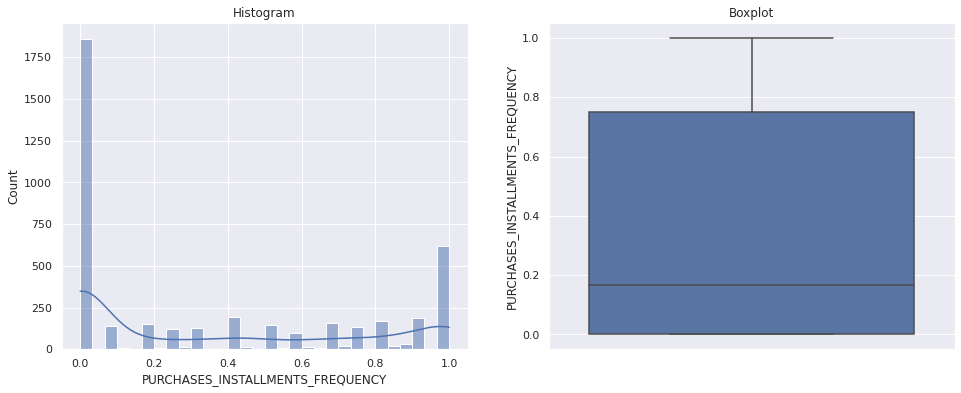

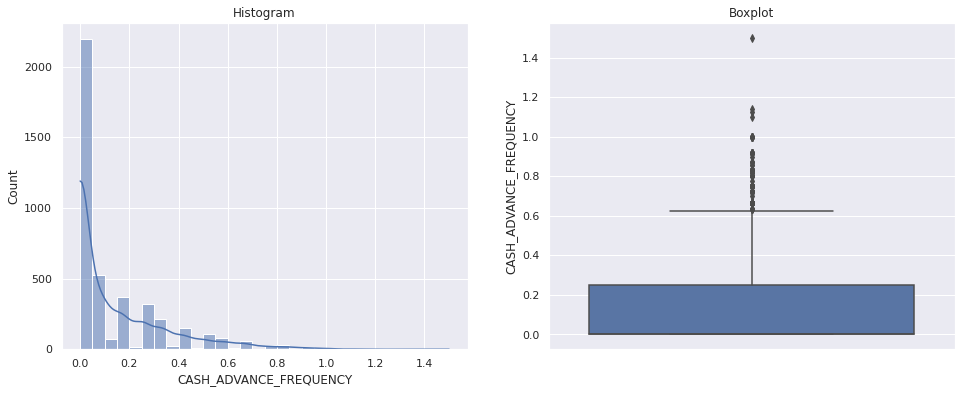

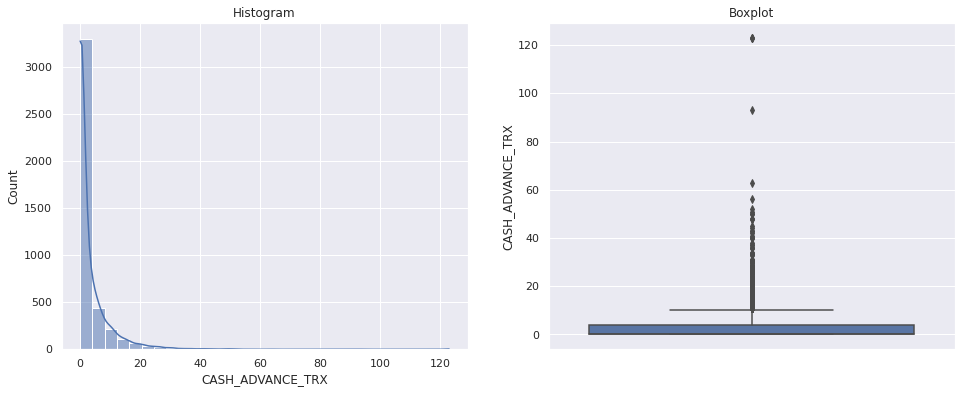

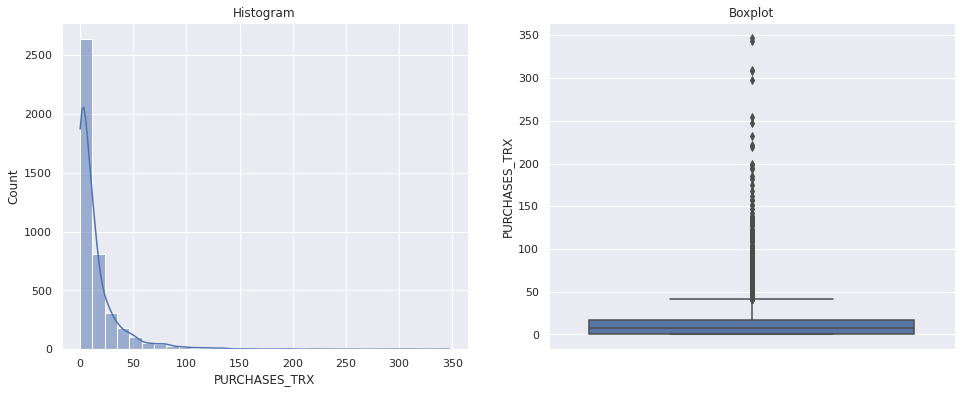

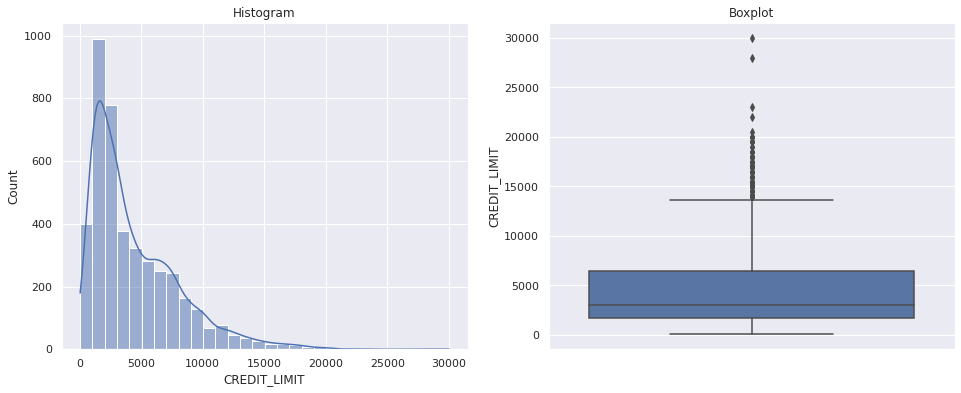

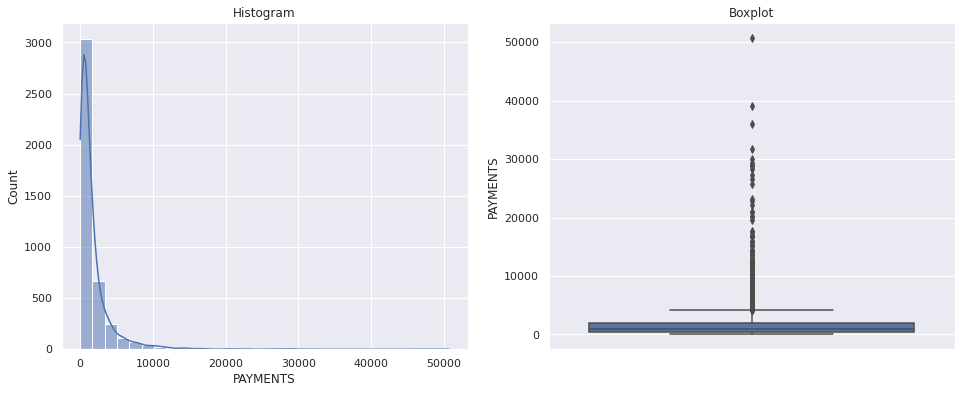

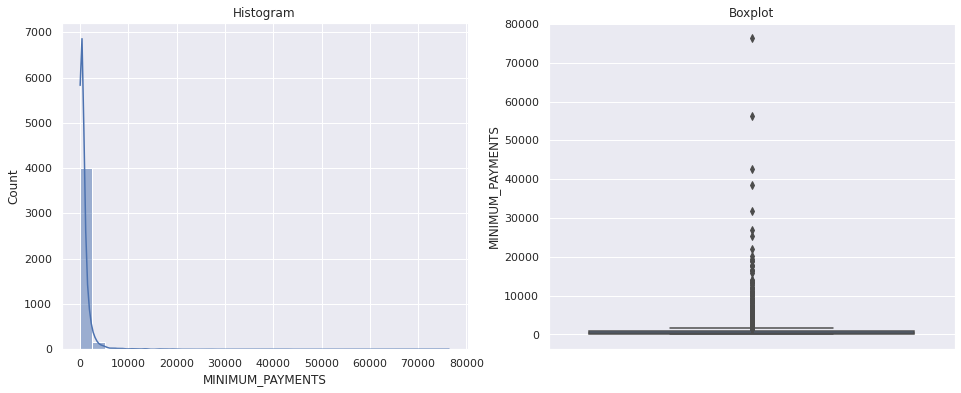

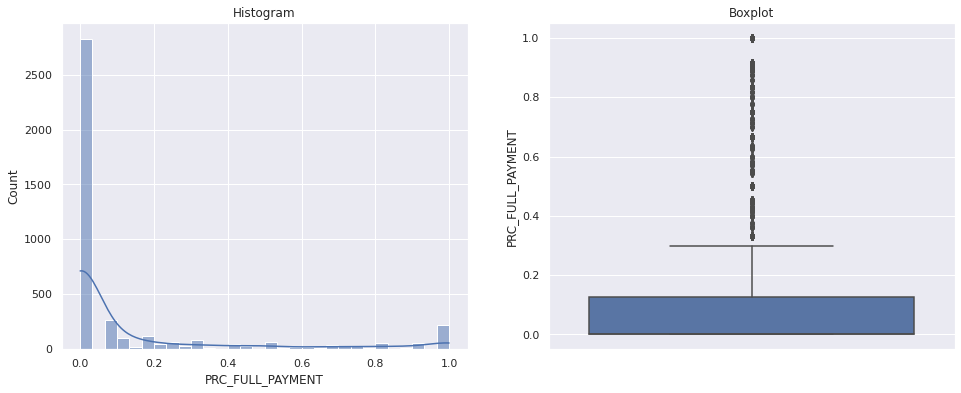

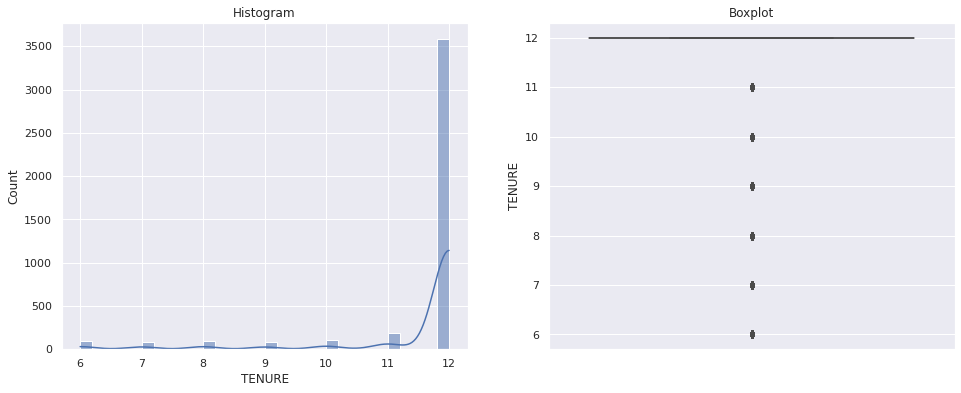

In [21]:
# plotting for numerical columns
for i in num_columns:
  outlier_plot(raw_data_3[i])

In [22]:
# Capping numerical columns
raw_data_4 = raw_data_3.copy()
for i in num_columns:
    capping_data(raw_data_3, i)

## V.IV Feature Selection

In [23]:
# find corelation between features
data_cor = raw_data_4.corr() 
data_cor

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,1.000000,-0.025054,0.014788,0.010039,0.007898,0.008742,-0.036373,0.005661,-0.005982,0.006073,-0.021104,0.002406,0.000622,-0.019366,-0.000055,0.028676,-0.004785,0.000068
BALANCE,-0.025054,1.000000,0.320964,0.187042,0.164769,0.128811,0.521778,-0.075789,0.065492,-0.057653,0.470392,0.396375,0.160996,0.525929,0.317130,0.378108,-0.321088,0.069078
BALANCE_FREQUENCY,0.014788,0.320964,1.000000,0.135288,0.100455,0.129419,0.112726,0.230051,0.202274,0.176594,0.193798,0.141270,0.187788,0.090967,0.061448,0.126547,-0.067171,0.110957
PURCHASES,0.010039,0.187042,0.135288,1.000000,0.914345,0.625353,-0.051932,0.407116,0.508209,0.324517,-0.116313,-0.062622,0.699852,0.359594,0.617131,0.129198,0.182067,0.085078
ONEOFF_PURCHASES,0.007898,0.164769,0.100455,0.914345,1.000000,0.255834,-0.044740,0.265212,0.522029,0.124162,-0.085730,-0.050003,0.526165,0.323534,0.574295,0.069548,0.131992,0.067284
INSTALLMENTS_PURCHASES,0.008742,0.128811,0.129419,0.625353,0.255834,1.000000,-0.037864,0.460610,0.207092,0.535181,-0.112540,-0.053210,0.656699,0.234876,0.366679,0.174177,0.180510,0.073275
CASH_ADVANCE,-0.036373,0.521778,0.112726,-0.051932,-0.044740,-0.037864,1.000000,-0.208878,-0.081030,-0.166069,0.662327,0.697329,-0.045566,0.306926,0.421861,0.139731,-0.167926,-0.059983
PURCHASES_FREQUENCY,0.005661,-0.075789,0.230051,0.407116,0.265212,0.460610,-0.208878,1.000000,0.502694,0.863101,-0.295917,-0.189397,0.559609,0.107233,0.109518,0.024931,0.324798,0.045292
ONEOFF_PURCHASES_FREQUENCY,-0.005982,0.065492,0.202274,0.508209,0.522029,0.207092,-0.081030,0.502694,1.000000,0.141338,-0.110653,-0.057466,0.531187,0.264216,0.253581,-0.031866,0.174577,0.088815
PURCHASES_INSTALLMENTS_FREQUENCY,0.006073,-0.057653,0.176594,0.324517,0.124162,0.535181,-0.166069,0.863101,0.141338,1.000000,-0.244080,-0.153563,0.522962,0.051107,0.091663,0.051441,0.261138,0.051104


In [24]:
# Drop data
raw_data_4.drop('CUST_ID', axis=1, inplace=True)

## V.VI Feature scaling

In [25]:
# Define scaler
scaler = MinMaxScaler()

# Scaled the data
scaler.fit(raw_data_4)
raw_data_4_Scaled = scaler.transform(raw_data_4)

In [26]:
# Summarized new data
raw_data_4_Scaled

array([[2.07248945e-04, 1.25000000e-01, 1.09621344e-03, ...,
        4.07843958e-03, 0.00000000e+00, 3.33333333e-01],
       [0.00000000e+00, 0.00000000e+00, 4.28814336e-03, ...,
        4.07843958e-03, 0.00000000e+00, 3.33333333e-01],
       [4.09809063e-02, 8.75000000e-01, 3.83431099e-03, ...,
        3.45335804e-02, 0.00000000e+00, 3.33333333e-01],
       ...,
       [7.15208780e-02, 1.00000000e+00, 0.00000000e+00, ...,
        4.09412344e-03, 0.00000000e+00, 8.33333333e-01],
       [5.73322114e-02, 1.00000000e+00, 0.00000000e+00, ...,
        3.62621901e-03, 0.00000000e+00, 8.33333333e-01],
       [1.86405521e-01, 1.00000000e+00, 4.99386120e-03, ...,
        1.07036552e-02, 0.00000000e+00, 8.33333333e-01]])

In [27]:
# Define new raw_data_5 to new dataframe
raw_data_5 = pd.DataFrame(raw_data_4_Scaled, columns=raw_data_4.columns)

In [28]:
raw_data_5.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.000207,0.125,0.001096,0.001108,0.0,0.0,0.125,0.125,0.0,0.0,0.0,0.002882,0.015025,0.000000,0.004078,0.0,0.333333
1,0.000000,0.000,0.004288,0.004333,0.0,0.0,0.125,0.125,0.0,0.0,0.0,0.002882,0.232053,0.000000,0.004078,0.0,0.333333
2,0.040981,0.875,0.003834,0.003875,0.0,0.0,0.125,0.125,0.0,0.0,0.0,0.017291,0.038397,0.029464,0.034534,0.0,0.333333
3,0.014304,0.375,0.028014,0.028308,0.0,0.0,0.125,0.125,0.0,0.0,0.0,0.002882,0.038397,0.059726,0.001118,0.0,0.333333
4,0.023823,1.000,0.014616,0.014770,0.0,0.0,0.125,0.125,0.0,0.0,0.0,0.002882,0.031720,0.004245,0.001804,0.0,0.333333


## V.VII Checking for Multicollinearity 

In [29]:
# make new dataframe for VIF test
vif_data = pd.DataFrame()
vif_data["feature"] = raw_data_5.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(raw_data_5.values, i) for i in range(len(raw_data_5.columns))]

vif_data

,feature,VIF
0,BALANCE,4.082502
1,BALANCE_FREQUENCY,13.914856
2,PURCHASES,52843.472098
3,ONEOFF_PURCHASES,31451.085686
4,INSTALLMENTS_PURCHASES,9139.239062
5,CASH_ADVANCE,3.660828
6,PURCHASES_FREQUENCY,26.694979
7,ONEOFF_PURCHASES_FREQUENCY,5.567802
8,PURCHASES_INSTALLMENTS_FREQUENCY,17.347066
9,CASH_ADVANCE_FREQUENCY,4.941014


- There are several features that's not correlated with other feature (VIF values lower than 5)
- if we're going to reduce the dimension, at least it could be reduced to 8 dimensions

## V.VIII Reducing dimension using PCA

In [30]:
# define pca with 95%
pca_scaled=PCA(n_components=0.95).fit(raw_data_5)
pca_scaled.explained_variance_ratio_

array([0.49726545, 0.13958351, 0.12437443, 0.0758931 , 0.07055326,
       0.03706187, 0.01790106])

From vif we're expected to reduce featurers to 8, but using pca we could reduce it to 7 features.

In [31]:
# scaled dataset with pca
data_scaled=pca_scaled.transform(raw_data_5)

In [32]:
# summarized new data
data_scaled

array([[-0.62522194, -0.20101833,  0.3660549 , ..., -0.14218813,
         0.00873863,  0.02697898],
       [-0.6321673 , -0.20313568,  0.41159893, ..., -0.22567095,
         0.16287024,  0.12468905],
       [-0.54631592, -0.02112338,  0.05143777, ...,  0.34803679,
        -0.17040224,  0.13699117],
       ...,
       [-0.66458453, -0.02850884, -0.12336609, ...,  0.21909992,
         0.01770356, -0.17227429],
       [-0.66419642, -0.02815208, -0.12117651, ...,  0.21783712,
         0.01901687, -0.16644777],
       [-0.57431299,  0.09956028, -0.15291562, ...,  0.21362468,
         0.22767223, -0.01406738]])

In [33]:
np.sum(pca_scaled.explained_variance_ratio_)

0.9626326752070913

# VI. Modelling

In [34]:
# Function for silhouette
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

## VI.I Modelling KMeans

### VI.I.I Model define, elbow test and silhouette test

In [35]:
# Define kmeans algorithm
kmeans=KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=2, random_state=42)

Text(0, 0.5, 'Inertia')

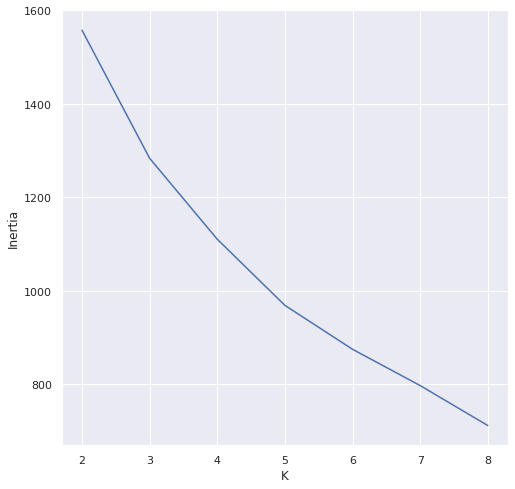

In [37]:
# Elbow test
K=[2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i).fit(data_scaled).inertia_ for i in K]
plt.figure(figsize=(8, 8))
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

From the above chart, we can see the 3rd k or 5th k that makes the elbow.

For n_clusters = 2 The average silhouette_score is : 0.40212831770408203
For n_clusters = 3 The average silhouette_score is : 0.38727253367043163
For n_clusters = 4 The average silhouette_score is : 0.33231285263737326
For n_clusters = 5 The average silhouette_score is : 0.3334107095701725
For n_clusters = 6 The average silhouette_score is : 0.3124542440991782
For n_clusters = 7 The average silhouette_score is : 0.32986331793315904
For n_clusters = 8 The average silhouette_score is : 0.32972324988652274


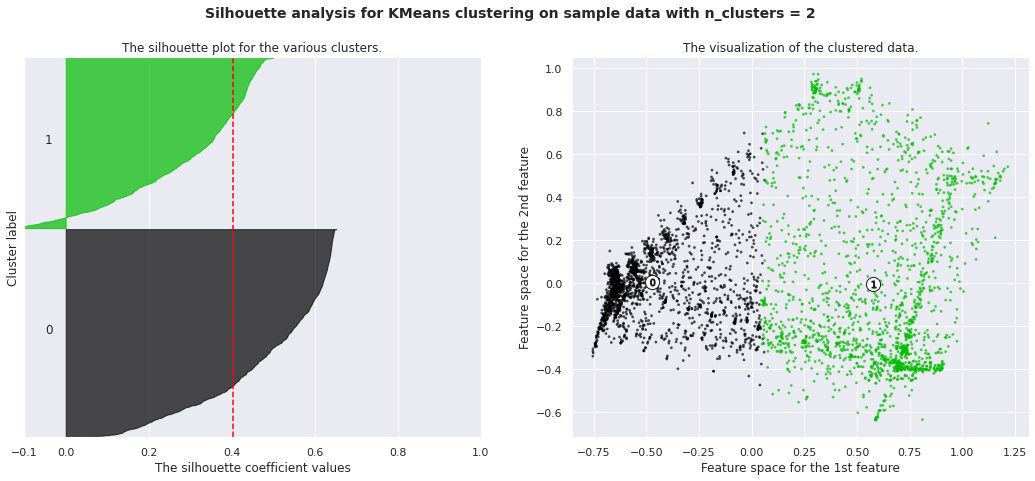

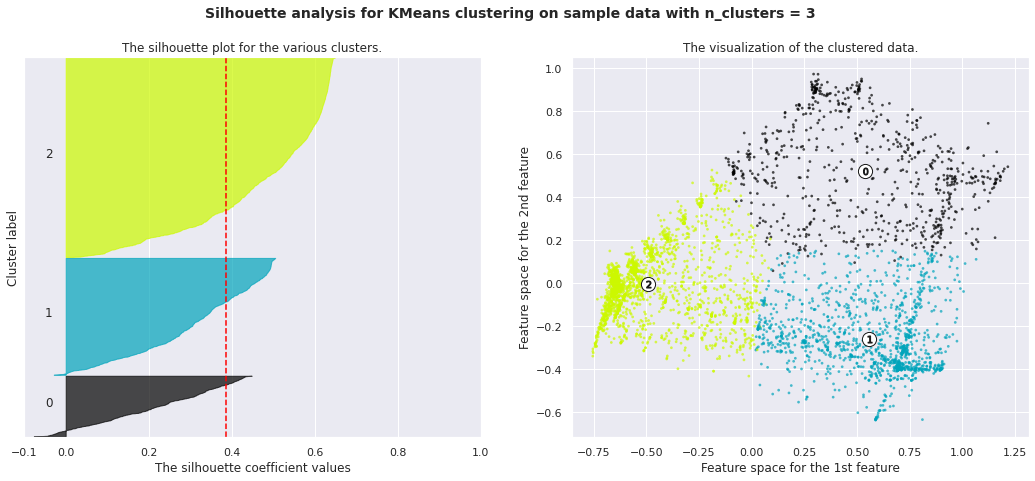

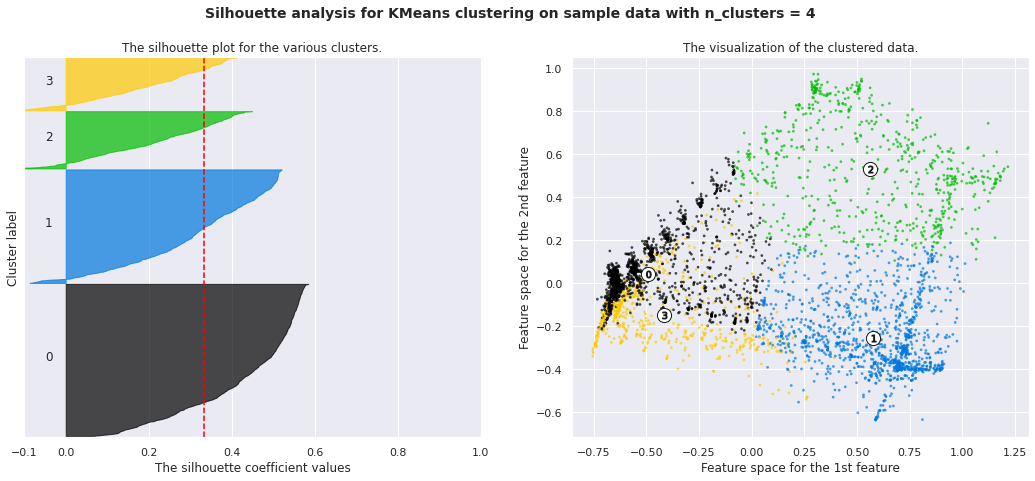

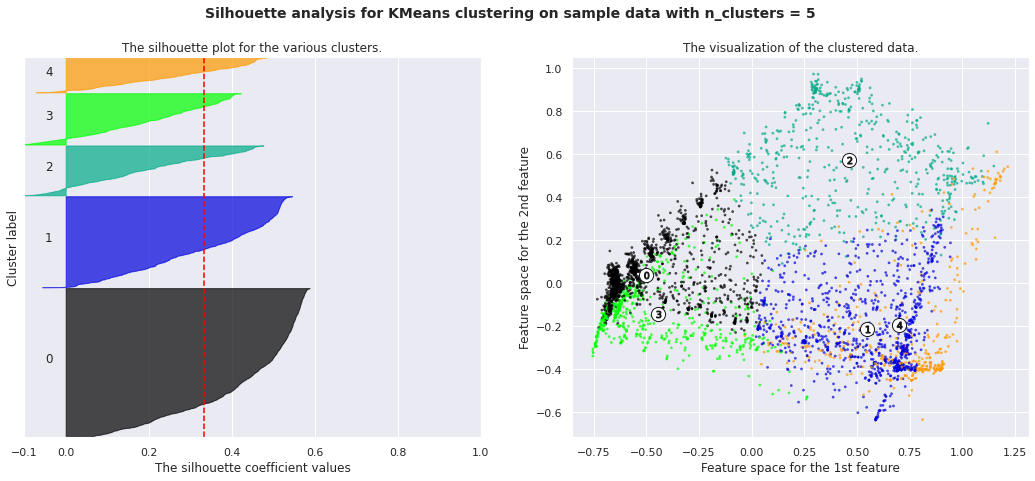

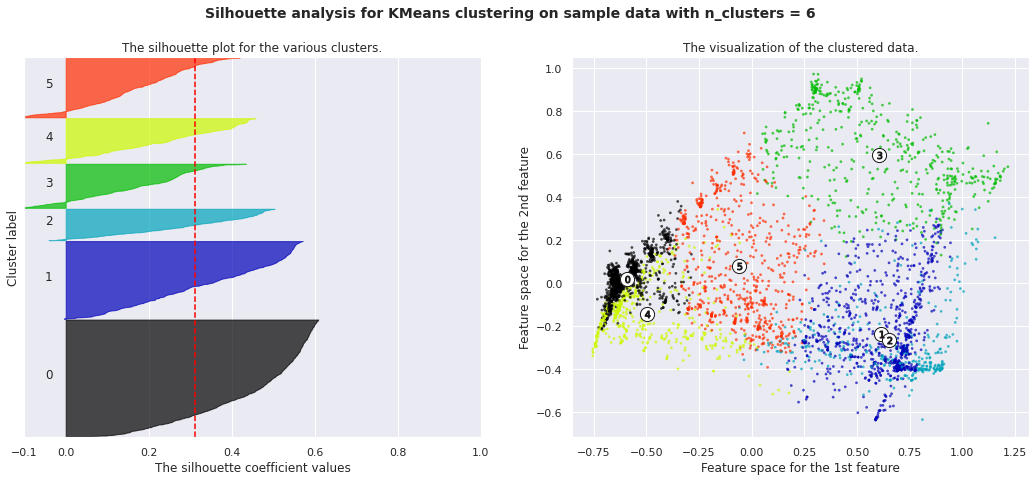

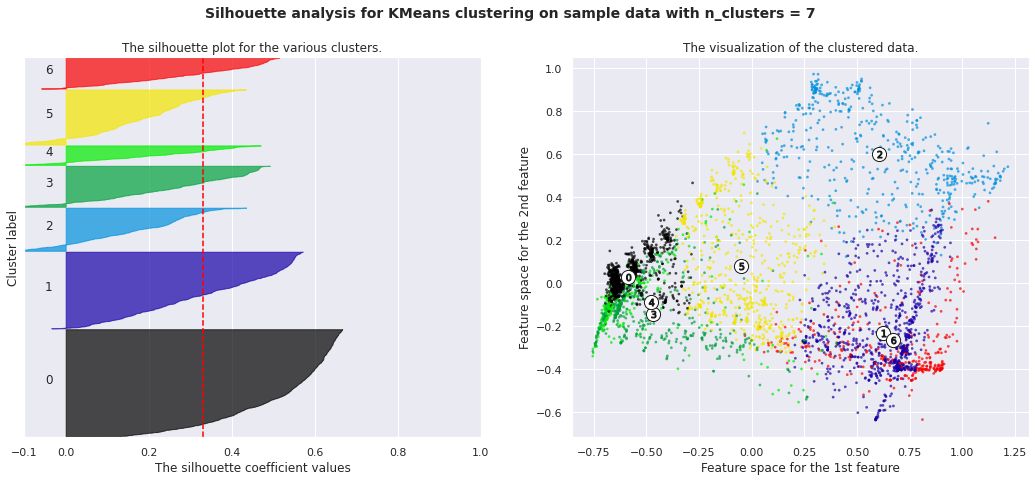

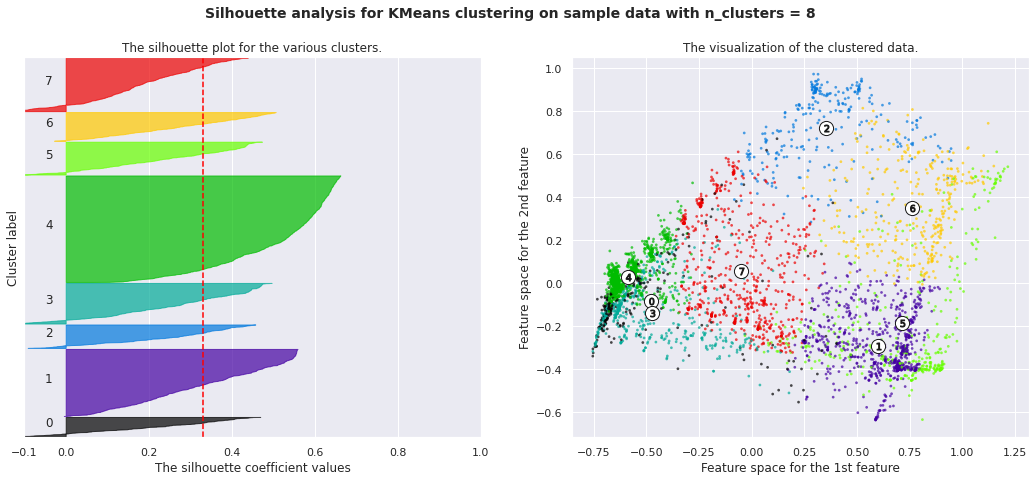

In [38]:
# Silhouette test
plot_silhouette(K,data_scaled)

from the silhouette test we found that 2 clusters scored the highest. But if we look closer at the coefficient values, the difference between the two silhouette is quite significant. So we choose the 3rd one with less difference between the coefficient of the  three silhouette and the second highest scores.

### VI.I.II KMeans Model Training

In [39]:
kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [40]:
print(kmeans.labels_)
print(kmeans.inertia_)

[1 1 1 ... 1 1 1]
1283.6482073450218


In [41]:
y_pred = kmeans.fit_predict(data_scaled)

### VI.I.III Model evaluation

#### VI.I.III.I make cluster results with 2d pca Visualization

In [42]:
# Function for mapping clusters with
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [43]:
# define pca with 2 dimensions
pca_scaled_2d=PCA(n_components=2).fit(raw_data_5)
pca_scaled_2d.explained_variance_ratio_

array([0.49726545, 0.13958351])

In [44]:
# scaled dataset with pca
data_scaled_2d=pca_scaled_2d.transform(raw_data_5)

In [45]:
kmeans_2=KMeans(n_clusters=3, random_state=42)
kmeans_2.fit(data_scaled_2d)

KMeans(n_clusters=3, random_state=42)

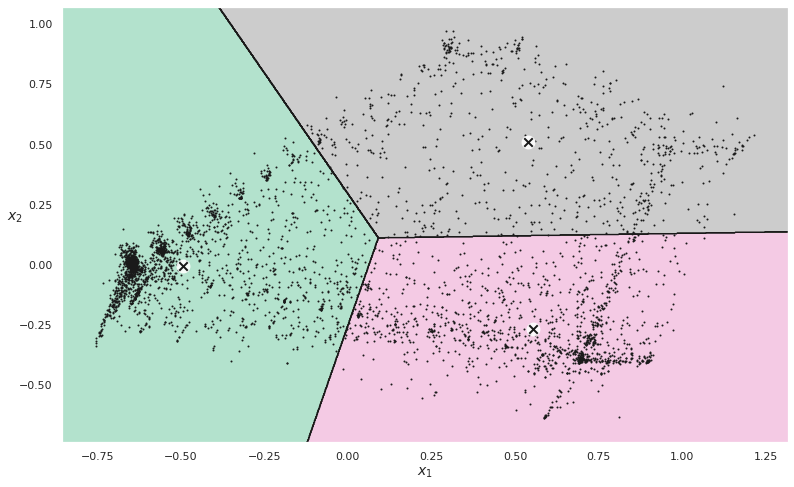

In [46]:
plt.figure(figsize=(13, 8))
plot_decision_boundaries(kmeans_2, data_scaled_2d)
plt.show()

We can see that there are 3 clusters, the one one on the left, the one on the bottom right, and the one on the top right(although this cluster actually spread out, unlike the other cluster)

#### VI.I.III.II EDA for clustering

In [47]:
# Clustering Results
result_table = raw_data_1.copy()
result_table['group'] = y_pred
result_table.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,group
2380,4027,7091.028361,1.000000,0.00,0.00,0.00,2137.809373,0.000000,0.000000,0.000000,0.250000,5,0,8500.0,1835.361842,2701.584337,0.000000,12,1
3815,3207,1155.976500,1.000000,0.00,0.00,0.00,1115.920030,0.000000,0.000000,0.000000,0.166667,2,0,1500.0,1298.142663,443.370345,0.000000,12,1
1949,1537,7.207350,0.545455,152.02,0.00,152.02,0.000000,0.583333,0.000000,0.500000,0.000000,0,7,1000.0,219.445915,99.133361,0.500000,12,2
660,3777,68.624743,1.000000,423.23,243.23,180.00,0.000000,1.000000,0.111111,0.888889,0.000000,0,10,1000.0,458.251229,107.879849,0.500000,9,2
2099,5119,32.381593,0.818182,445.70,0.00,445.70,0.000000,0.833333,0.000000,0.833333,0.000000,0,10,2500.0,563.718775,170.968893,0.875000,12,2
3406,603,3616.993845,0.888889,0.00,0.00,0.00,4947.781762,0.000000,0.000000,0.000000,0.555556,7,0,5500.0,529.726072,1294.501736,0.000000,9,1
2159,8777,465.003141,1.000000,500.00,500.00,0.00,0.000000,0.111111,0.111111,0.000000,0.000000,0,1,1000.0,109.818409,357.651724,0.000000,9,1
977,7377,519.444307,1.000000,525.00,0.00,525.00,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,1500.456687,806.258492,0.083333,12,2
1242,3913,3.744802,0.272727,154.50,154.50,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3800.0,178.897596,30.229283,0.000000,12,1
1224,3241,605.744452,1.000000,119.00,119.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1800.0,253.057215,445.558120,0.000000,12,1


##### Group  no: 1

In [48]:
# Group  no: 1
result_table[result_table['group'] == 0].sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,group
434,1247,426.372628,1.0,5749.96,5439.96,310.00,0.000000,1.000000,1.000000,0.250000,0.000000,0,50,12000.0,5711.540654,202.732090,0.833333,12,0
360,303,228.909884,1.0,2617.85,2426.43,191.42,0.000000,1.000000,0.916667,0.416667,0.000000,0,35,1800.0,1774.318305,143.208454,0.700000,12,0
1030,7923,392.667425,1.0,4015.23,4015.23,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,26,7500.0,3189.923177,176.910200,0.916667,12,0
2013,8073,92.596405,1.0,720.11,720.11,0.00,0.000000,0.583333,0.583333,0.000000,0.000000,0,16,1700.0,535.430352,193.498368,0.222222,12,0
3991,7373,5220.637076,1.0,2911.02,1647.30,1263.72,1992.386858,1.000000,0.833333,1.000000,0.166667,4,85,6000.0,2044.047768,1313.547582,0.000000,12,0


In [49]:
print(f'median of payments: {result_table[result_table["group"] == 0]["PAYMENTS"].median()}')
print(f'median of credit limit: {result_table[result_table["group"] == 0]["CREDIT_LIMIT"].median()}')
print(f'median of purchases frequency: {result_table[result_table["group"] == 0]["PURCHASES_FREQUENCY"].median()}')
print(f'median of purchases installments frequency: {result_table[result_table["group"] == 0]["PURCHASES_INSTALLMENTS_FREQUENCY"].median()}')
print(f'mean of purchases installmentes frequency: {result_table[result_table["group"] == 0]["PURCHASES_INSTALLMENTS_FREQUENCY"].mean()}')
print(f'median of oneoff purchases: {result_table[result_table["group"] == 0]["ONEOFF_PURCHASES"].median()}')
print(f'median of oneoff purchases frequency: {result_table[result_table["group"] == 0]["ONEOFF_PURCHASES_FREQUENCY"].median()}')
print(f'mean of oneoff purchases frequency: {result_table[result_table["group"] == 0]["ONEOFF_PURCHASES_FREQUENCY"].mean()}')

median of payments: 1934.821016
median of credit limit: 6000.0
median of purchases frequency: 1.0
median of purchases installments frequency: 0.454545
mean of purchases installmentes frequency: 0.4719959767103353
median of oneoff purchases: 1530.37
median of oneoff purchases frequency: 0.833333
mean of oneoff purchases frequency: 0.7945006011644833


##### Group  no: 2

In [50]:
# Group  no: 2
result_table[result_table['group'] == 1].sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,group
150,2769,268.797746,1.000000,70.00,0.00,70.00,0.000000,0.500000,0.00,0.416667,0.000000,0,6,1000.0,105.954038,229.157988,0.000,12,1
3890,7495,1943.038819,1.000000,0.00,0.00,0.00,399.745986,0.000000,0.00,0.000000,0.166667,4,0,2000.0,748.233144,1155.324802,0.000,12,1
4323,3887,4931.589653,1.000000,0.00,0.00,0.00,379.770302,0.000000,0.00,0.000000,0.416667,14,0,5000.0,1026.639661,2349.407548,0.000,12,1
42,2971,1670.146578,0.727273,3420.97,3420.97,0.00,0.000000,0.250000,0.25,0.000000,0.000000,0,31,2700.0,1164.552612,1283.600242,0.125,12,1
3653,5067,5976.796897,1.000000,1194.52,0.00,1194.52,790.205561,0.416667,0.00,0.333333,0.333333,6,15,6000.0,2722.095294,2670.210603,0.000,12,1


In [51]:
print(f'median of payments: {result_table[result_table["group"] == 1]["PAYMENTS"].median()}')
print(f'median of credit limit: {result_table[result_table["group"] == 1]["CREDIT_LIMIT"].median()}')
print(f'median of purchases frequency: {result_table[result_table["group"] == 1]["PURCHASES_FREQUENCY"].median()}')
print(f'median of purchases installments frequency: {result_table[result_table["group"] == 1]["PURCHASES_INSTALLMENTS_FREQUENCY"].median()}')
print(f'mean of purchases installmentes frequency: {result_table[result_table["group"] == 1]["PURCHASES_INSTALLMENTS_FREQUENCY"].mean()}')
print(f'median of oneoff purchases: {result_table[result_table["group"] == 1]["ONEOFF_PURCHASES"].median()}')
print(f'median of oneoff purchases frequency: {result_table[result_table["group"] == 1]["ONEOFF_PURCHASES_FREQUENCY"].median()}')
print(f'mean of oneoff purchases frequency: {result_table[result_table["group"] == 1]["ONEOFF_PURCHASES_FREQUENCY"].mean()}')

median of payments: 679.003219
median of credit limit: 3000.0
median of purchases frequency: 0.083333
median of purchases installments frequency: 0.0
mean of purchases installmentes frequency: 0.06095516384683892
median of oneoff purchases: 0.0
median of oneoff purchases frequency: 0.0
mean of oneoff purchases frequency: 0.07936050712377614


##### Group  no: 3

In [52]:
# Group  no: 3
result_table[result_table['group'] == 2].sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,group
3431,7025,3520.616355,0.900000,1675.91,947.70,728.21,10213.652970,0.900000,0.200000,0.800000,0.300000,9,26,10000.0,3148.054919,819.267218,0.125000,10,2
445,1325,103.792136,1.000000,1607.84,168.27,1439.57,0.000000,1.000000,0.083333,1.000000,0.000000,0,38,7000.0,1563.287264,178.816786,0.833333,12,2
4203,185,16115.596400,1.000000,684.74,105.30,579.44,4354.002428,1.000000,0.083333,1.000000,0.583333,15,15,18000.0,3546.061550,5743.736444,0.000000,12,2
1523,1847,16.024822,0.818182,113.44,0.00,113.44,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,3000.0,126.999931,132.500307,0.111111,12,2
882,6341,3006.295536,1.000000,1430.24,50.00,1380.24,0.000000,1.000000,0.083333,1.000000,0.000000,0,92,3000.0,2034.512438,3337.263197,0.000000,12,2


In [53]:
print(f'median of payments: {result_table[result_table["group"] == 2]["PAYMENTS"].median()}')
print(f'median of credit limit: {result_table[result_table["group"] == 2]["CREDIT_LIMIT"].median()}')
print(f'median of purchases frequency: {result_table[result_table["group"] == 2]["PURCHASES_FREQUENCY"].median()}')
print(f'median of purchases installments frequency: {result_table[result_table["group"] == 2]["PURCHASES_INSTALLMENTS_FREQUENCY"].median()}')
print(f'mean of purchases installmentes frequency: {result_table[result_table["group"] == 2]["PURCHASES_INSTALLMENTS_FREQUENCY"].mean()}')
print(f'median of oneoff purchases: {result_table[result_table["group"] == 2]["ONEOFF_PURCHASES"].median()}')
print(f'median of oneoff purchases frequency: {result_table[result_table["group"] == 2]["ONEOFF_PURCHASES_FREQUENCY"].median()}')
print(f'mean of oneoff purchases frequency: {result_table[result_table["group"] == 2]["ONEOFF_PURCHASES_FREQUENCY"].mean()}')

median of payments: 821.0244104999999
median of credit limit: 3000.0
median of purchases frequency: 1.0
median of purchases installments frequency: 0.875
mean of purchases installmentes frequency: 0.823553477238238
median of oneoff purchases: 0.0
median of oneoff purchases frequency: 0.0
mean of oneoff purchases frequency: 0.10078735432473443


In [157]:
print(f'Count of first group: {result_table[result_table["group"] == 0]["group"].count()}')
print(f'Count of second group: {result_table[result_table["group"] == 1]["group"].count()}')
print(f'Count of third group: {result_table[result_table["group"] == 2]["group"].count()}')

Count of first group: 687
Count of second group: 2246
Count of third group: 1318


#### Findings from query results of every group
The first group has the highest median credit limit of \$ 6000. The first group also has the highest median payments of \$ 1934. They also on average the most frequent one-off purchaser(0.794 out of 1.0). The first and third group really likes to shop with median of purchases frequncy of 1.0 out of 1.0. The 2nd group shop the least, despite has the same median credit limit as the third group. The third group despite not spending as much as the first group, They love to purchase with installment, they are the most frequnet shoppers with installment(median score of 0.875 out of 1.0).
The second group(the one who spent the least).

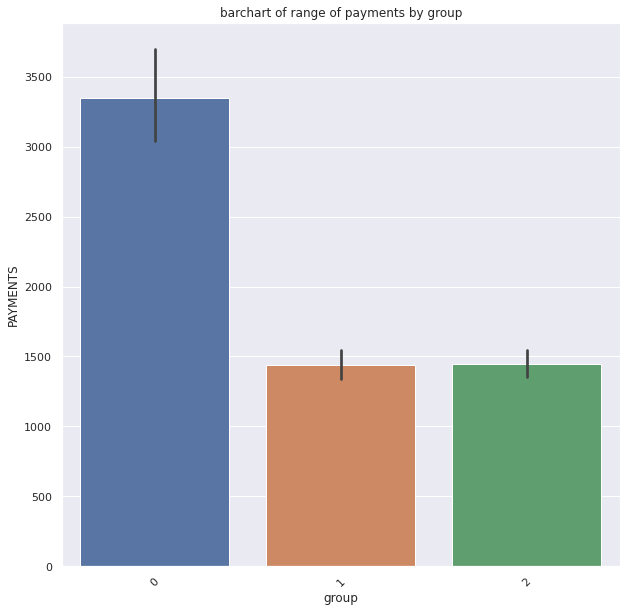

In [54]:
# Create plots

plt.figure(figsize=(10, 10))

sns.barplot(y=result_table['PAYMENTS'], x=result_table['group'])
plt.xticks(rotation=45)
plt.title('barchart of range of payments by group')

plt.show()


- 0: First Group
- 1: Second Group
- 2: Third Group

The chart above confirm the findings before, that shows the first group spend the most

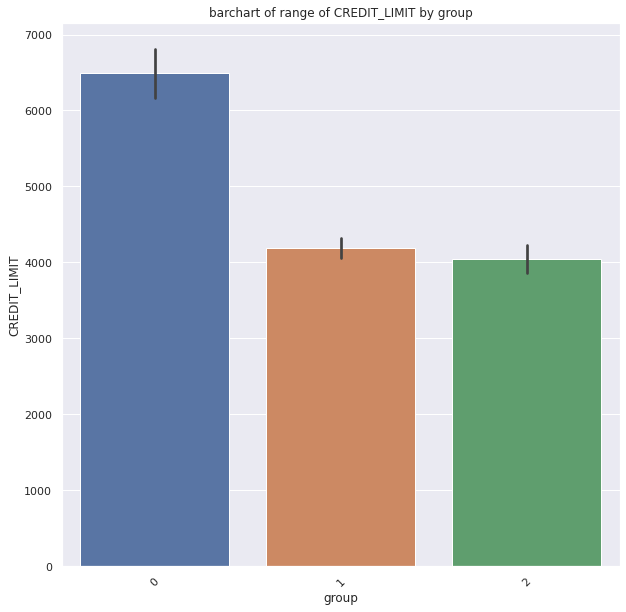

In [55]:
# Create plots

plt.figure(figsize=(10, 10))

sns.barplot(y=result_table['CREDIT_LIMIT'], x=result_table['group'])
plt.xticks(rotation=45)
plt.title('barchart of range of CREDIT_LIMIT by group')

plt.show()


- 0: First Group
- 1: Second Group
- 2: Third Group

The chart above shows the range of the credit limits of each group. We can see the first group have the highest credit limits.

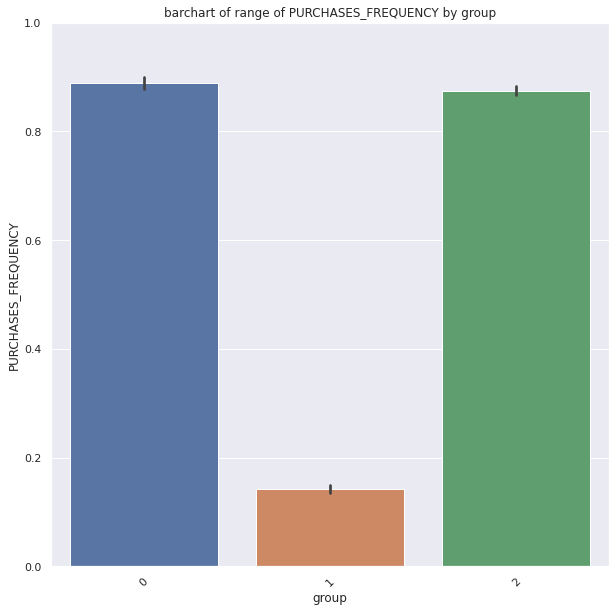

In [56]:
# Create plots

plt.figure(figsize=(10, 10))

sns.barplot(y=result_table['PURCHASES_FREQUENCY'], x=result_table['group'])
plt.xticks(rotation=45)
plt.ylim(top=1)
plt.title('barchart of range of PURCHASES_FREQUENCY by group')

plt.show()


- 0: First Group
- 1: Second Group
- 2: Third Group

The chart above shows the that both the first group and the third group love to shop with credit cards. While the second group not really spending money with their credit cards.

### VI.I.IV KMeans Model Analysis

From the elbow test, we found see the optimum on the 3rd k or 5th k. while the silhouette test we found that 2 clusters scored the highest. But if we look closer at the coefficient values, the difference between the two silhouette is quite significant. So we choose the 3rd one with less difference between the coefficient of the three silhouette and the second highest scores. After that we define and train the model.

once we're done training the model. We PCA the data to make them 2 dimensional, so we can visalize the cluster in 2d.

The model we've made is realtively good fit. Although the first group cluster is quite spread out. Perhaps it caused by small numbers of wealthy people(we can conclude that the first group is wealthy individuals after our data exploration) and they have different behaviors with other wealthy individuals.

## VI.II Modelling DBScan

In [61]:
dbscan = DBSCAN(eps=0.25, min_samples=5)
dbscan.fit(data_scaled)

DBSCAN(eps=0.25)

In [62]:
dbscan.labels_[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
dbscan2 = DBSCAN(eps=0.5, min_samples=10)
dbscan2.fit(data_scaled)

DBSCAN(min_samples=10)

In [64]:
dbscan3 = DBSCAN(eps=0.25, min_samples=50)
dbscan3.fit(data_scaled)

DBSCAN(eps=0.25, min_samples=50)

In [65]:
dbscan4 = DBSCAN(eps=0.30, min_samples=30)
dbscan4.fit(data_scaled)

DBSCAN(eps=0.3, min_samples=30)

In [66]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

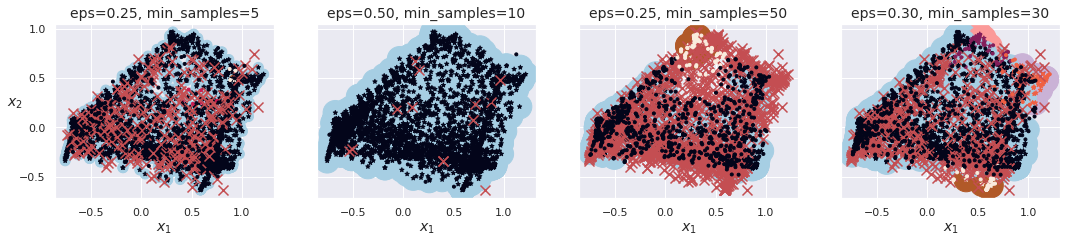

In [67]:
plt.figure(figsize=(18, 3.2))

plt.subplot(141)
plot_dbscan(dbscan, data_scaled, size=100)

plt.subplot(142)
plot_dbscan(dbscan2, data_scaled, size=600, show_ylabels=False)


plt.subplot(143)
plot_dbscan(dbscan3, data_scaled, size=600, show_ylabels=False)

plt.subplot(144)
plot_dbscan(dbscan4, data_scaled, size=600, show_ylabels=False)

plt.show()

### VI.II.IV DBSCan Model Analysis

After tuning the model(with hyperparameter). The dataset that we have is not compatible with DBScan algorithm. It only makes one cluster, or if it makes other cluster, there'll be a lots of outlier and incomprehensible. Therefore we're not going to use this model.

## VI.III Modelling Gaussian Mixture

### VI.III.I Define Gaussian Mixture

In [68]:
#GMM akan membuat 10 model (n_init) masing2 ada 3 cluster (n_components) lalu diambil performa terbaiknya
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(data_scaled)

GaussianMixture(n_components=3, random_state=42)

### VI.III.II Training Gaussian Mixture

In [69]:
# Train model
y_pred_2 = gm.predict(data_scaled)

In [70]:
y_pred_2

array([1, 1, 1, ..., 1, 1, 1])

### VI.III.III Evaluation Gaussian Mixture

In [71]:
# Function to Plot Centroids

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [72]:
# Function to Plot GMM's Decision Boundary

from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

#### VI.III.III.I Make 2d model for visualization

In [73]:
# make 2d gm for visualization
gm_2d = GaussianMixture(n_components=3, random_state=42)
gm_2d.fit(data_scaled_2d)

GaussianMixture(n_components=3, random_state=42)

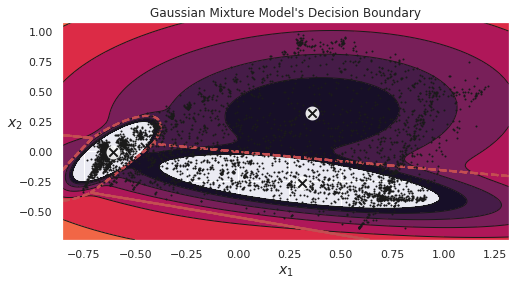

In [74]:
# Plot GMM's Decision Boundary

plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm_2d, data_scaled_2d)
plt.title('Gaussian Mixture Model\'s Decision Boundary')
plt.show()



- Normal distribution viewed from above
- The red line is the decision boundary
- The black line that determines how far from the centroid / the farther it is, the higher the probability of outliers.

##### Clustering results

In [75]:
# Clustering Results
result_table_2 = raw_data_1.copy()
result_table_2['group'] = y_pred_2
result_table_2.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,group
1356,8129,191.376930,1.000000,510.00,0.00,780.00,0.000000,0.555556,0.000000,0.444444,0.000000,0,7,1000.0,459.174840,128.231992,0.00,9,2
818,5539,387.967458,1.000000,944.49,0.00,944.49,0.000000,1.000000,0.000000,1.000000,0.000000,0,23,1000.0,831.708548,218.808215,0.00,12,0
2675,5187,1256.612223,1.000000,498.99,498.99,0.00,1353.144310,0.250000,0.250000,0.000000,0.500000,10,8,3000.0,685.344851,308.964645,0.00,12,0
1014,7723,3642.140907,1.000000,3338.10,218.82,3119.28,0.000000,1.000000,0.166667,1.000000,0.000000,0,32,6000.0,1793.138722,871.776232,0.00,12,0
3127,3801,1371.187284,1.000000,208.76,149.00,59.76,73.235325,0.250000,0.166667,0.166667,0.083333,2,5,1500.0,447.764231,1969.536576,0.00,12,0
269,3463,416.729679,0.909091,1243.04,1153.34,89.70,0.000000,0.750000,0.583333,0.250000,0.000000,0,22,3500.0,2257.677587,171.444686,0.30,12,2
3072,7283,1191.955492,1.000000,0.00,0.00,0.00,275.762341,0.000000,0.000000,0.000000,0.083333,1,0,1500.0,266.593820,276.874306,0.00,12,1
3268,3205,448.788728,1.000000,32.38,32.38,0.00,545.642707,0.083333,0.083333,0.000000,0.083333,2,1,5000.0,0.000000,NaN,0.00,12,1
2333,435,1357.969348,0.454545,0.00,0.00,0.00,2903.355319,0.000000,0.000000,0.000000,0.250000,6,0,6000.0,12353.265460,717.788508,0.20,12,2
479,1783,421.796337,1.000000,2748.74,1623.74,1125.00,0.000000,1.000000,1.000000,0.666667,0.000000,0,48,4500.0,2684.860370,169.599243,0.25,12,0


##### Group  no: 1

In [76]:
# Group  no: 1
result_table_2[result_table_2['group'] == 0].sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,group
748,4765,1534.294061,1.0,6508.72,3342.90,3165.82,0.0,1.000000,0.250000,1.000000,0.0,0,44,6000.0,4954.001262,379.022468,0.000000,12,0
549,2591,21.664126,1.0,271.86,30.00,241.86,0.0,1.000000,0.083333,0.916667,0.0,0,12,4000.0,263.919053,144.825209,0.777778,12,0
1647,2349,240.110414,1.0,3510.42,1732.87,1777.55,0.0,0.916667,0.416667,0.750000,0.0,0,37,6500.0,3868.013636,188.187607,0.545455,12,0
725,4499,66.618088,1.0,544.00,0.00,544.00,0.0,1.000000,0.000000,1.000000,0.0,0,16,3000.0,473.490702,183.996450,0.000000,12,0
1520,1527,1606.875936,1.0,1863.48,1302.00,561.48,0.0,0.666667,0.083333,0.666667,0.0,0,20,6500.0,698.650140,328.146908,0.000000,12,0


In [154]:
print(f'median of payments: {result_table_2[result_table_2["group"] == 0]["PAYMENTS"].median()}')
print(f'median of credit limit: {result_table_2[result_table_2["group"] == 0]["CREDIT_LIMIT"].median()}')
print(f'median of purchases frequency: {result_table_2[result_table_2["group"] == 0]["PURCHASES_FREQUENCY"].median()}')
print(f'median of purchases installments: {result_table_2[result_table_2["group"] == 0]["INSTALLMENTS_PURCHASES"].median()}')
print(f'median of purchases installments frequency: {result_table_2[result_table_2["group"] == 0]["PURCHASES_INSTALLMENTS_FREQUENCY"].median()}')
print(f'mean of purchases installmentes frequency: {result_table_2[result_table_2["group"] == 0]["PURCHASES_INSTALLMENTS_FREQUENCY"].mean()}')
print(f'median of oneoff purchases: {result_table_2[result_table_2["group"] == 0]["ONEOFF_PURCHASES"].median()}')
print(f'median of oneoff purchases frequency: {result_table_2[result_table_2["group"] == 0]["ONEOFF_PURCHASES_FREQUENCY"].median()}')
print(f'mean of oneoff purchases frequency: {result_table_2[result_table_2["group"] == 0]["ONEOFF_PURCHASES_FREQUENCY"].mean()}')

median of payments: 1282.359
median of credit limit: 4000.0
median of purchases frequency: 0.916667
median of purchases installments: 354.96
median of purchases installments frequency: 0.666667
mean of purchases installmentes frequency: 0.5745614293903061
median of oneoff purchases: 309.66
median of oneoff purchases frequency: 0.166667
mean of oneoff purchases frequency: 0.33116205054716036


##### Group  no: 2

In [78]:
# Group  no: 2
result_table_2[result_table_2['group'] == 1].sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,group
4158,1353,5083.397311,1.000000,331.95,331.95,0.0,10384.824160,0.200000,0.200000,0.0,0.800000,31,2,8000.0,4453.691497,1088.959964,0.0,10,1
4309,1915,5995.793488,1.000000,0.00,0.00,0.0,3454.101774,0.000000,0.000000,0.0,0.416667,12,0,6500.0,1868.475426,1486.185877,0.0,12,1
1263,4955,1096.949604,1.000000,227.55,227.55,0.0,0.000000,0.083333,0.083333,0.0,0.000000,0,2,2500.0,397.836763,352.173130,0.0,12,1
3801,2621,669.973636,0.545455,0.00,0.00,0.0,1479.440572,0.000000,0.000000,0.0,0.166667,3,0,3000.0,1616.215963,121.550312,0.0,12,1
2963,3269,482.671967,1.000000,0.00,0.00,0.0,18.976859,0.000000,0.000000,0.0,0.083333,1,0,500.0,132.659676,266.857429,0.0,12,1


In [153]:
print(f'median of payments: {result_table_2[result_table_2["group"] == 1]["PAYMENTS"].median()}')
print(f'median of credit limit: {result_table_2[result_table_2["group"] == 1]["CREDIT_LIMIT"].median()}')
print(f'median of purchases frequency: {result_table_2[result_table_2["group"] == 1]["PURCHASES_FREQUENCY"].median()}')
print(f'median of purchases installments: {result_table_2[result_table_2["group"] == 1]["INSTALLMENTS_PURCHASES"].median()}')
print(f'median of purchases installments frequency: {result_table_2[result_table_2["group"] == 1]["PURCHASES_INSTALLMENTS_FREQUENCY"].median()}')
print(f'mean of purchases installmentes frequency: {result_table_2[result_table_2["group"] == 1]["PURCHASES_INSTALLMENTS_FREQUENCY"].mean()}')
print(f'median of oneoff purchases: {result_table_2[result_table_2["group"] == 1]["ONEOFF_PURCHASES"].median()}')
print(f'median of oneoff purchases frequency: {result_table_2[result_table_2["group"] == 1]["ONEOFF_PURCHASES_FREQUENCY"].median()}')
print(f'mean of oneoff purchases frequency: {result_table_2[result_table_2["group"] == 1]["ONEOFF_PURCHASES_FREQUENCY"].mean()}')

median of payments: 580.933813
median of credit limit: 3000.0
median of purchases frequency: 0.0
median of purchases installments: 0.0
median of purchases installments frequency: 0.0
mean of purchases installmentes frequency: 0.0
median of oneoff purchases: 0.0
median of oneoff purchases frequency: 0.0
mean of oneoff purchases frequency: 0.052290116535433244


##### Group  no: 3

In [80]:
# Group  no: 3
result_table_2[result_table_2['group'] == 2].sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,group
2485,5741,5796.622219,0.875000,423.38,223.38,200.00,6739.693779,0.625000,0.250000,0.375000,0.250000,18,9,8000.0,813.941630,1523.155003,0.000000,8,2
3931,3601,639.830783,0.636364,578.19,380.67,197.52,1848.938533,0.500000,0.166667,0.416667,0.166667,4,25,2000.0,2247.506595,218.280473,0.000000,12,2
4071,3425,355.323994,0.636364,284.11,284.11,0.00,855.147084,0.166667,0.166667,0.000000,0.166667,2,2,1500.0,1765.584677,265.343044,0.181818,12,2
3858,5687,539.581502,0.818182,0.00,0.00,0.00,2296.860678,0.000000,0.000000,0.000000,0.166667,2,0,1200.0,2443.777007,258.855956,0.125000,12,2
2290,8939,106.894095,0.909091,62.73,0.00,62.73,0.000000,0.272727,0.000000,0.181818,0.000000,0,3,5000.0,540.130507,146.069474,0.272727,11,2


In [152]:
print(f'median of payments: {result_table_2[result_table_2["group"] == 2]["PAYMENTS"].median()}')
print(f'median of credit limit: {result_table_2[result_table_2["group"] == 2]["CREDIT_LIMIT"].median()}')
print(f'median of purchases frequency: {result_table_2[result_table_2["group"] == 2]["PURCHASES_FREQUENCY"].median()}')
print(f'median of purchases installments: {result_table_2[result_table_2["group"] == 2]["INSTALLMENTS_PURCHASES"].median()}')
print(f'median of purchases installments frequency: {result_table_2[result_table_2["group"] == 2]["PURCHASES_INSTALLMENTS_FREQUENCY"].median()}')
print(f'mean of purchases installmentes frequency: {result_table_2[result_table_2["group"] == 2]["PURCHASES_INSTALLMENTS_FREQUENCY"].mean()}')
print(f'median of oneoff purchases: {result_table_2[result_table_2["group"] == 2]["ONEOFF_PURCHASES"].median()}')
print(f'median of oneoff purchases frequency: {result_table_2[result_table_2["group"] == 2]["ONEOFF_PURCHASES_FREQUENCY"].median()}')
print(f'mean of oneoff purchases frequency: {result_table_2[result_table_2["group"] == 2]["ONEOFF_PURCHASES_FREQUENCY"].mean()}')

median of payments: 662.4092774999999
median of credit limit: 3000.0
median of purchases frequency: 0.583333
median of purchases installments: 201.085
median of purchases installments frequency: 0.416667
mean of purchases installmentes frequency: 0.4181041751412434
median of oneoff purchases: 0.0
median of oneoff purchases frequency: 0.0
mean of oneoff purchases frequency: 0.1459462542372881


#### Findings from query results of every group
The first group has the highest median credit limit of \$ 4000.0. The first group also has the highest median payments of \$ 1282.359. They also on average the most frequent one-off purchaser(0.331 out of 1.0). The first also likes to shop the most with median of purchases frequncy of 0.97 out of 1.0. The 2nd group shop the least, despite has the same median credit limit as the third group. 

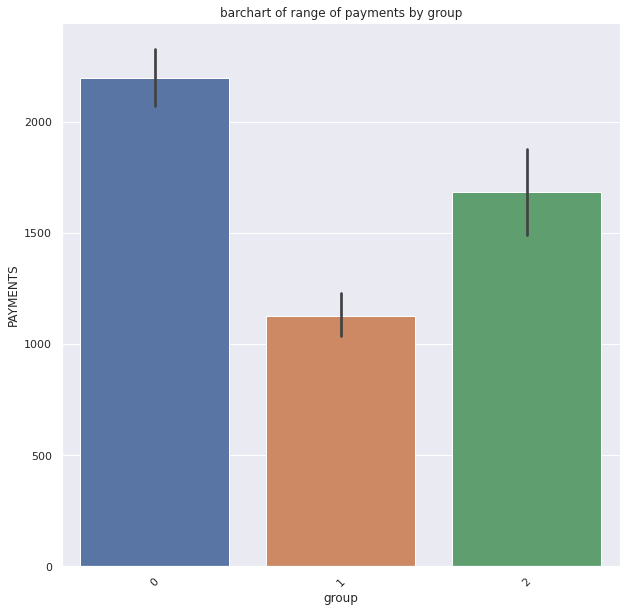

In [82]:
# Create plots

plt.figure(figsize=(10, 10))

sns.barplot(y=result_table_2['PAYMENTS'], x=result_table_2['group'])
plt.xticks(rotation=45)
plt.title('barchart of range of payments by group')

plt.show()

- 0: First Group
- 1: Second Group
- 2: Third Group

The chart above confirm the findings before, that shows the first group spend the most

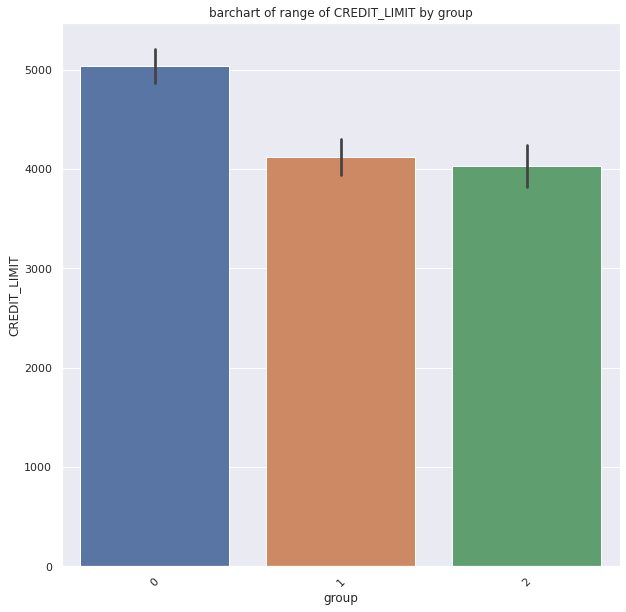

In [83]:
# Create plots

plt.figure(figsize=(10, 10))

sns.barplot(y=result_table_2['CREDIT_LIMIT'], x=result_table_2['group'])
plt.xticks(rotation=45)
plt.title('barchart of range of CREDIT_LIMIT by group')

plt.show()

- 0: First Group
- 1: Second Group
- 2: Third Group

The chart above shows the range of the credit limits of each group. We can see the first group have the highest credit limits.

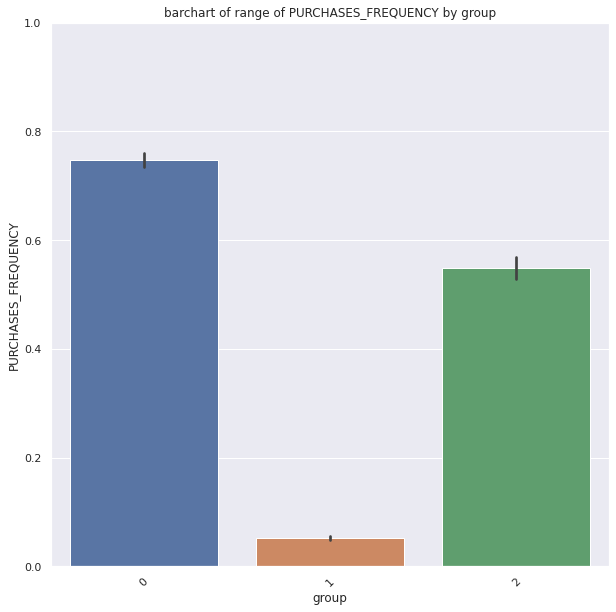

In [84]:
plt.figure(figsize=(10, 10))

sns.barplot(y=result_table_2['PURCHASES_FREQUENCY'], x=result_table_2['group'])
plt.xticks(rotation=45)
plt.ylim(top=1)
plt.title('barchart of range of PURCHASES_FREQUENCY by group')

plt.show()

- 0: First Group
- 1: Second Group
- 2: Third Group

The chart above shows the that both the first group and the third group love to shop with credit cards. While the second group not really spending money with their credit cards.

### VI.III.IV Gausian mixed Model Analysis

The results are more or less the same with the KMeans model. 

The model we've made is realtively good fit. Unlike the kmens model which cant detect outlier, the gausian mixed model can detect outlier. The problem is, we kinda need all the data, that means the outlier. so we use KMeans model instead.

# VII. Save Model inference

In [131]:
# save model
with open('kmeans.pkl', 'wb') as file_1:
  joblib.dump(kmeans, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('pca.pkl', 'wb') as file_3:
  joblib.dump(pca_scaled, file_3)

with open('list_num.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('pca_2d.pkl', 'wb') as file_5:
  joblib.dump(pca_scaled_2d, file_5)

with open('kmeans_2.pkl', 'wb') as file_6:
  joblib.dump(kmeans_2, file_6)

# VIII. Model inference

In [132]:
# load All files

with open('kmeans.pkl', 'rb') as file_1:
  kmeans_s = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('pca.pkl', 'rb') as file_3:
  model_pca = joblib.load(file_3)

with open('list_num.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

with open('pca_2d.pkl', 'rb') as file_5:
  model_pca_2d = joblib.load(file_5)

with open('kmeans_2.pkl', 'rb') as file_6:
  kmeans_s2 = joblib.load(file_6)

#### Ineferencing

In [117]:
# display inference-set
data_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3178,1057,657.831607,1.000000,612.25,0.00,612.25,1422.284696,1.000000,0.000000,1.000000,0.083333,1,20,1500.0,2223.160653,170.167003,0.142857,12
1087,8567,212.840350,1.000000,1944.48,864.38,1080.10,0.000000,1.000000,0.666667,1.000000,0.000000,0,36,6000.0,1780.988408,182.318690,0.416667,12
2777,5195,5656.069801,1.000000,362.36,362.36,0.00,7240.433194,0.250000,0.250000,0.000000,1.250000,12,2,8000.0,683.421497,2036.877611,0.000000,8
2151,8825,256.028048,1.000000,627.42,0.00,627.42,0.000000,0.833333,0.000000,0.833333,0.000000,0,16,2500.0,288.225797,174.799517,0.083333,12
2334,575,204.584048,0.818182,0.00,0.00,0.00,628.366944,0.000000,0.000000,0.000000,0.250000,3,0,1600.0,1933.810453,152.106855,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,4189,72.251911,0.727273,665.50,228.00,437.50,0.000000,0.416667,0.166667,0.333333,0.000000,0,12,4000.0,1443.726409,106.632133,0.500000,12
463,1577,1.632453,0.363636,1985.62,0.00,1985.62,0.000000,1.000000,0.000000,1.000000,0.000000,0,41,7500.0,1792.109113,0.261984,0.000000,12
3927,7193,2551.808695,1.000000,179.90,179.90,0.00,196.095144,0.250000,0.250000,0.000000,0.166667,3,7,3000.0,586.174437,924.177666,0.000000,12
2745,1025,2210.404961,1.000000,1790.64,1358.40,432.24,1660.667560,1.000000,0.833333,1.000000,0.750000,18,52,10500.0,8862.839094,478.820544,0.000000,12


In [118]:
# define numerical columns
data_inf_num = data_inf[list_num_cols]

data_inf_num

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3178,1057,657.831607,1.000000,612.25,0.00,612.25,1422.284696,1.000000,0.000000,1.000000,0.083333,1,20,1500.0,2223.160653,170.167003,0.142857,12
1087,8567,212.840350,1.000000,1944.48,864.38,1080.10,0.000000,1.000000,0.666667,1.000000,0.000000,0,36,6000.0,1780.988408,182.318690,0.416667,12
2777,5195,5656.069801,1.000000,362.36,362.36,0.00,7240.433194,0.250000,0.250000,0.000000,1.250000,12,2,8000.0,683.421497,2036.877611,0.000000,8
2151,8825,256.028048,1.000000,627.42,0.00,627.42,0.000000,0.833333,0.000000,0.833333,0.000000,0,16,2500.0,288.225797,174.799517,0.083333,12
2334,575,204.584048,0.818182,0.00,0.00,0.00,628.366944,0.000000,0.000000,0.000000,0.250000,3,0,1600.0,1933.810453,152.106855,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,4189,72.251911,0.727273,665.50,228.00,437.50,0.000000,0.416667,0.166667,0.333333,0.000000,0,12,4000.0,1443.726409,106.632133,0.500000,12
463,1577,1.632453,0.363636,1985.62,0.00,1985.62,0.000000,1.000000,0.000000,1.000000,0.000000,0,41,7500.0,1792.109113,0.261984,0.000000,12
3927,7193,2551.808695,1.000000,179.90,179.90,0.00,196.095144,0.250000,0.250000,0.000000,0.166667,3,7,3000.0,586.174437,924.177666,0.000000,12
2745,1025,2210.404961,1.000000,1790.64,1358.40,432.24,1660.667560,1.000000,0.833333,1.000000,0.750000,18,52,10500.0,8862.839094,478.820544,0.000000,12


In [119]:
# fillna values
median = data_inf_num['MINIMUM_PAYMENTS'].median()
data_inf_num['MINIMUM_PAYMENTS'].fillna(median, inplace=True)

In [120]:
# drop cust_id
data_inf_num.drop('CUST_ID', axis=1, inplace=True)

In [126]:
# feature sfcaling and feature encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)

data_inf_num_scaled

array([[0.035567  , 1.        , 0.01491459, ..., 0.00222689, 0.142857  ,
        1.        ],
       [0.01150765, 1.        , 0.04736811, ..., 0.00238593, 0.416667  ,
        1.        ],
       [0.30580692, 1.        , 0.0088272 , ..., 0.02665829, 0.        ,
        0.33333333],
       ...,
       [0.13796873, 1.        , 0.00438242, ..., 0.01209534, 0.        ,
        1.        ],
       [0.11951004, 1.        , 0.04362053, ..., 0.00626653, 0.        ,
        1.        ],
       [0.15840278, 1.        , 0.00916045, ..., 0.01840031, 0.        ,
        1.        ]])

In [127]:
# pca the data
data_inf_num_pca = model_pca.transform(data_inf_num_scaled)

In [128]:
# predict model
y_pred_inf = kmeans_s.predict(data_inf_num_pca)
y_pred_inf

array([2, 0, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0,
       1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 1,
       1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 2,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1,
       2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 1,
       1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1,
       2, 1, 0, 2], dtype=int32)

In [129]:
# Clustering Results for inference
result_table_inf = data_inf.copy()
result_table_inf['group'] = y_pred_inf
result_table_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,group
3178,1057,657.831607,1.000000,612.25,0.00,612.25,1422.284696,1.000000,0.000000,1.000000,0.083333,1,20,1500.0,2223.160653,170.167003,0.142857,12,2
1087,8567,212.840350,1.000000,1944.48,864.38,1080.10,0.000000,1.000000,0.666667,1.000000,0.000000,0,36,6000.0,1780.988408,182.318690,0.416667,12,0
2777,5195,5656.069801,1.000000,362.36,362.36,0.00,7240.433194,0.250000,0.250000,0.000000,1.250000,12,2,8000.0,683.421497,2036.877611,0.000000,8,1
2151,8825,256.028048,1.000000,627.42,0.00,627.42,0.000000,0.833333,0.000000,0.833333,0.000000,0,16,2500.0,288.225797,174.799517,0.083333,12,2
2334,575,204.584048,0.818182,0.00,0.00,0.00,628.366944,0.000000,0.000000,0.000000,0.250000,3,0,1600.0,1933.810453,152.106855,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,4189,72.251911,0.727273,665.50,228.00,437.50,0.000000,0.416667,0.166667,0.333333,0.000000,0,12,4000.0,1443.726409,106.632133,0.500000,12,1
463,1577,1.632453,0.363636,1985.62,0.00,1985.62,0.000000,1.000000,0.000000,1.000000,0.000000,0,41,7500.0,1792.109113,0.261984,0.000000,12,2
3927,7193,2551.808695,1.000000,179.90,179.90,0.00,196.095144,0.250000,0.250000,0.000000,0.166667,3,7,3000.0,586.174437,924.177666,0.000000,12,1
2745,1025,2210.404961,1.000000,1790.64,1358.40,432.24,1660.667560,1.000000,0.833333,1.000000,0.750000,18,52,10500.0,8862.839094,478.820544,0.000000,12,0


#### Visualized with 2d kmeans

In [130]:
# scaled dataset with pca
data_inf_num_pca_2d = model_pca_2d.transform(data_inf_num_scaled)

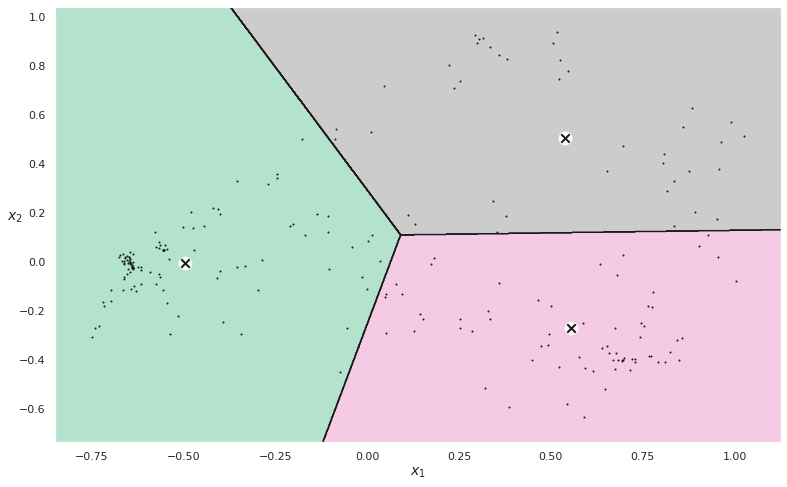

In [134]:
plt.figure(figsize=(13, 8))
plot_decision_boundaries(kmeans_s2, data_inf_num_pca_2d)
plt.show()

# IX. Conclusions

From dataset we explore, we found that The largest purchases a person has made is \$ 41050. While the median purchases made by a person is \$ 360. The people who uses the credit card, are varied with their uses, ther are lots who uses it often, and there are others who use it rarely, while there are a few in between. Most people rarely purchase one-off(paid once) using a credit card.

After the clusterring process, We found The first group has the highest median credit limit of \$ 6000. The first group also has the highest median payments of \$ 1934. They also on average the most frequent one-off purchaser(0.794 out of 1.0). The 2nd group shop the least, despite has the same median credit limit as the third group. The third group despite not spending as much as the first group, They love to purchase with installment, they are the most frequnet shoppers with installment.

We conclude that the first group are the wealthiest group and we want to keep them as happy as possible, as they are the most profitable bunch. For the third group (the group who likes to do installment) we should give them more deal or more choices for installment payment, since they are the most frequent installment purchaser. For the second group (the largest group) which are the least spender, We should research more on what kind of things they spend on, so we can determine and promote the kind of deals that would reach them.